In [1]:
%matplotlib widget
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
plt.style.use("ggplot")

In [2]:
# Create: User Parameters
# path_results = "/Users/june/Documents/results/lightning/lightning_logs/version_7/

path_root = "/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs"

path_list = []
for i, ele in enumerate(os.listdir(path_root)):
    #if "version" in ele:
    #if ele in ["version_%s" % j for j in all_versions]:
    #    path_list.append(os.path.join(path_root, ele, "metrics.csv"))
    path_list.append(os.path.join(path_root, ele, "metrics.csv"))

path_list

['/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_8/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_6/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_1/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_0/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_7/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_9/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/.DS_Store/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_15/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_12/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_24/metrics.csv',
 '/Users/june/Documents/results/RNNvsLSTM/dens_

In [3]:
path_list= path_list[-7]

In [4]:
path_list

'/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_27/metrics.csv'

In [5]:
def load_data(path):
    
    return pd.read_csv(path)

In [6]:
data = load_data(path_list)


In [7]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    
    print(ele)


------ Column Names ------

epoch
lr-Adam
step
train_loss
valid_emd_epoch
valid_emd_step
valid_loss_epoch
valid_loss_step
valid_mae_epoch
valid_mae_step
valid_mse_epoch
valid_mse_step


Column loss not found in DataFrame. Skipping train_loss
Column valod_emd_epoch not found in DataFrame. Skipping valod_emd_epoch
No data available for plotting train_loss
No data available for plotting valod_emd_epoch


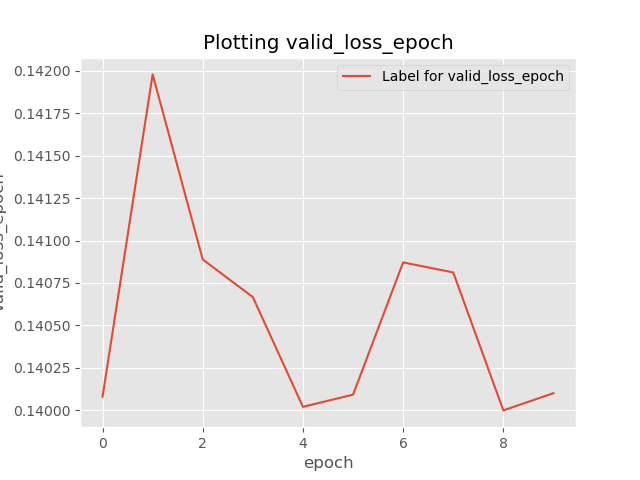

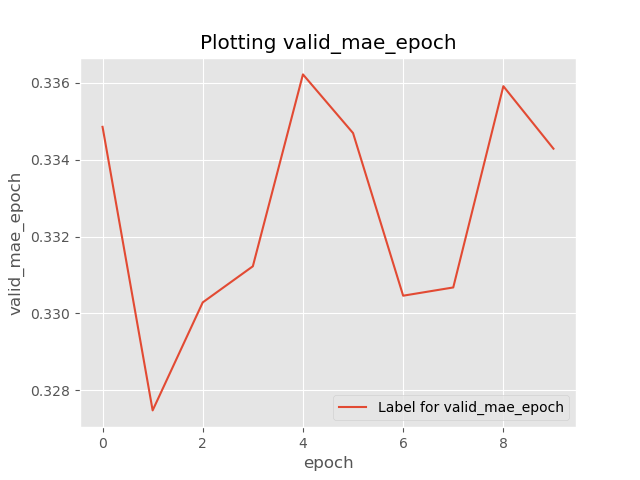

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    # Replace this function with your actual data loading logic
    return pd.read_csv(filepath)
target_names = ['train_loss', 'valod_emd_epoch', 'valid_loss_epoch', 'valid_mae_epoch']
# Assuming 'load_data' and 'path_list' are properly defined  # Update with your actual file paths
all_data = {name: [] for name in target_names}

data = load_data(path_list)  # Load data from the first file in the list
for name in target_names:
    if name in data.columns:  # Check if target name is in DataFrame columns
        df = data.dropna(subset=[name])  # Drop NaN values in the current target column
        if "lr" in name:
            tag = "epoch"
            x_vals = list(range(df.shape[0]))
        else:
            tag = name.split("_")[-1]  # Get the suffix like 'epoch'
            if tag in df.columns:  # Check if this column exists
                x_vals = df[tag]
            else:
                print(f"Column {tag} not found in DataFrame. Skipping {name}")
                continue
        y_vals = df[name]
        all_data[name].append((x_vals, y_vals, 'Label for ' + name))
    else:
        print(f"Column {name} not found in DataFrame. Skipping {name}")

# Plotting the data
for name in target_names:
    if name in all_data and all_data[name]:  # Check if data exists for plotting
        plt.figure()
        plt.title(f"Plotting {name}")
        plt.xlabel("Epoch" if "lr" in name else name.split("_")[-1])
        plt.ylabel(name)
        for x_vals, y_vals, label in all_data[name]:
            plt.plot(x_vals, y_vals, label=label)
        plt.legend()
        plt.show()
    else:
        print(f"No data available for plotting {name}")
